In [1]:
import os
os.chdir(os.path.expanduser('..'))
from src.models.train_model import RNNModule
from src.visualization.visualize import *

In [2]:
loaded_model = RNNModule.load_from_checkpoint('lightning_logs/cscl_kcl/version_3/checkpoints/epoch=107-step=711072.ckpt', input_size=1, hidden_size=128, output_size=1, num_layers=5, bidirectional=True).cpu()

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import *

In [5]:
book = pd.ExcelFile('data/raw/Book1.xlsx')
book.sheet_names

['0,1M NaCl', '0,1M LiCl', '0,1M CsCl', '0,1M KCl', '0,1M CsCl + 0,1M KCl']

In [6]:
df_cscl_kcl = pd.read_excel(book, book.sheet_names[-1])
df_cscl_kcl = df_cscl_kcl.dropna()
df_cscl_kcl

,Time,pH,Conductivity,pH.1,Conductivity.1
2,0.008333,10.53,24.8747,10.89,23.8546
3,0.016667,10.53,24.8747,10.89,23.8546
4,0.025,10.53,24.8747,10.89,23.8546
5,0.033333,10.53,24.8747,10.89,23.8546
6,0.041667,10.53,24.8747,10.89,23.8546
...,...,...,...,...,...
8227,68.558333,2.24,30.2637,2.05,14.8126
8228,68.566667,2.24,30.2999,2.05,14.7403
8229,68.575,2.24,30.2637,2.05,14.7403
8230,68.583333,2.24,30.2637,2.05,14.7403


In [7]:
import matplotlib.pyplot as plt

In [8]:
import torch

In [9]:
prepared_data = df_cscl_kcl.drop([df_cscl_kcl.columns[-2], df_cscl_kcl.columns[-3], df_cscl_kcl.columns[0]], axis=1)
prepared_data

,pH,Conductivity.1
2,10.53,23.8546
3,10.53,23.8546
4,10.53,23.8546
5,10.53,23.8546
6,10.53,23.8546
...,...,...
8227,2.24,14.8126
8228,2.24,14.7403
8229,2.24,14.7403
8230,2.24,14.7403


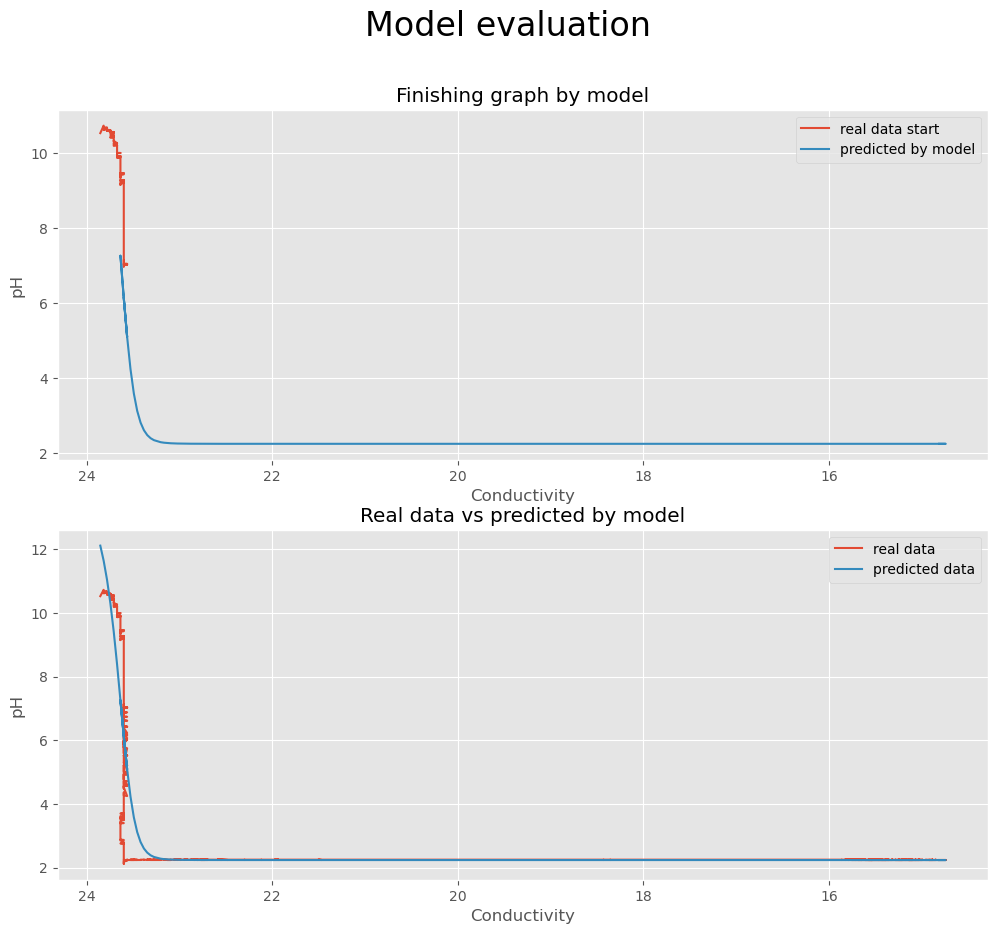

In [10]:
fig = plot_model_pred_vs_real_data(prepared_data, loaded_model, 500)
fig.savefig('lightning_logs/cscl_kcl/version_3/model_evaluation.svg', format='svg', dpi=1200)

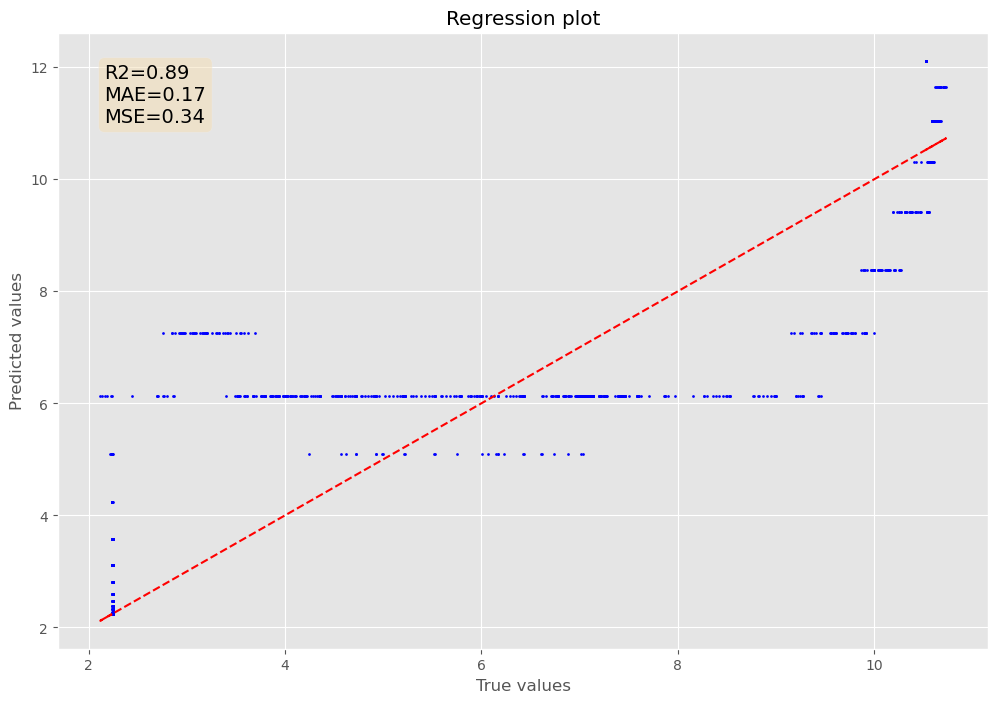

In [11]:
fig = plot_regression_true_vs_predicted(prepared_data, loaded_model, r2=True, mae=True, mse=True)
fig.savefig('lightning_logs/cscl_kcl/version_3/regression_plot.svg', format='svg', dpi=1200)

In [12]:
batch = torch.rand((1, 1))
loaded_model.eval()
torch.onnx.export(loaded_model, batch, 'lightning_logs/cscl_kcl/version_3/model.onnx', input_names=['Contuctivity'], output_names=['pH'])

================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



/home/alcatraz/miniconda3/envs/membrane_robot/lib/python3.11/site-packages/torch/onnx/symbolic_opset9.py:4476: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


In [13]:
loaded_model_2 = RNNModule.load_from_checkpoint('lightning_logs/cscl/version_2/checkpoints/epoch=39-step=265520.ckpt', input_size=1, hidden_size=256, output_size=1, num_layers=5, bidirectional=True).cpu()

In [14]:
df_cscl = pd.read_excel(book, book.sheet_names[-3])
df_cscl = df_cscl.dropna()
df_cscl

,Time,pH,Conductivity,pH.1,Conductivity.1,pH.2,Conductivity.2,pH.3,Conductivity.3
2,0.008333,12,8.8195,11.87,8.7003,11.93,8.7934,11.91,9.3901
3,0.016667,12,8.8195,11.87,8.7003,11.93,8.8115,11.91,9.3901
4,0.025,12,8.8195,11.87,8.7003,11.94,8.7826,11.91,9.3901
5,0.033333,12,8.8557,11.87,8.7003,11.94,8.7789,11.91,9.3901
6,0.041667,12.01,8.8557,11.87,8.6641,11.94,8.7789,11.91,9.3901
...,...,...,...,...,...,...,...,...,...
8295,69.116667,2,16.8849,1.92,9.8215,2.06,9.6866,2.21,9.9035
8296,69.125,2,16.8849,1.92,9.8215,2.05,9.683,2.21,9.9035
8297,69.133333,2,16.8849,1.92,9.8215,2.05,9.6866,2.21,9.9035
8298,69.141667,2,16.8849,1.92,9.8215,2.05,9.6866,2.21,9.9035


In [15]:
columns_names = df_cscl.columns
columns_names

Index(['Time', 'pH', 'Conductivity', 'pH.1', 'Conductivity.1', 'pH.2',
       'Conductivity.2', 'pH.3', 'Conductivity.3'],
      dtype='object')

In [16]:
prepared_data = df_cscl.drop([df_cscl.columns[0], df_cscl.columns[2], df_cscl.columns[3], df_cscl.columns[5], df_cscl.columns[6], df_cscl.columns[7], df_cscl.columns[8]], axis=1)
prepared_data = prepared_data.dropna()
prepared_data

,pH,Conductivity.1
2,12,8.7003
3,12,8.7003
4,12,8.7003
5,12,8.7003
6,12.01,8.6641
...,...,...
8295,2,9.8215
8296,2,9.8215
8297,2,9.8215
8298,2,9.8215


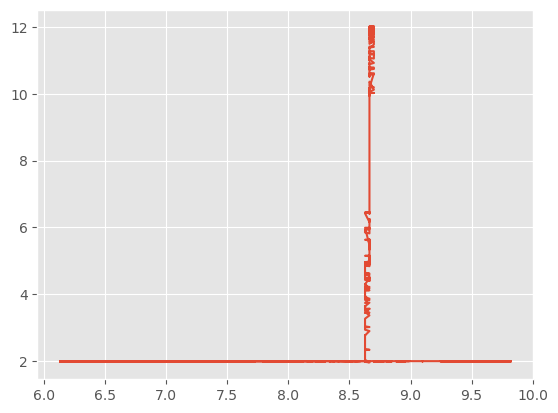

In [17]:
plt.plot(prepared_data[prepared_data.columns[-1]].values, prepared_data[prepared_data.columns[0]].values)

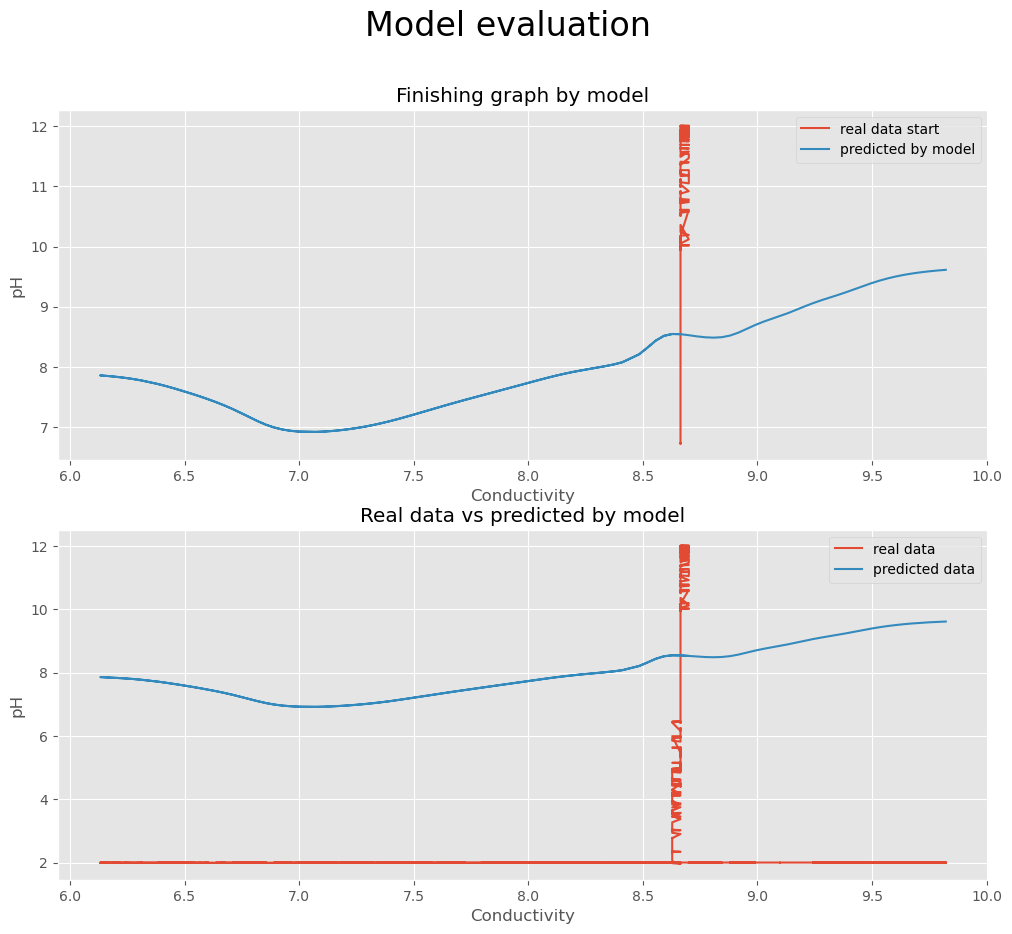

In [18]:
fig = plot_model_pred_vs_real_data(prepared_data, loaded_model_2, 500, reverse_x_axis=False)
fig.savefig('lightning_logs/cscl/version_2/model_evaluation.svg', format='svg', dpi=1200)

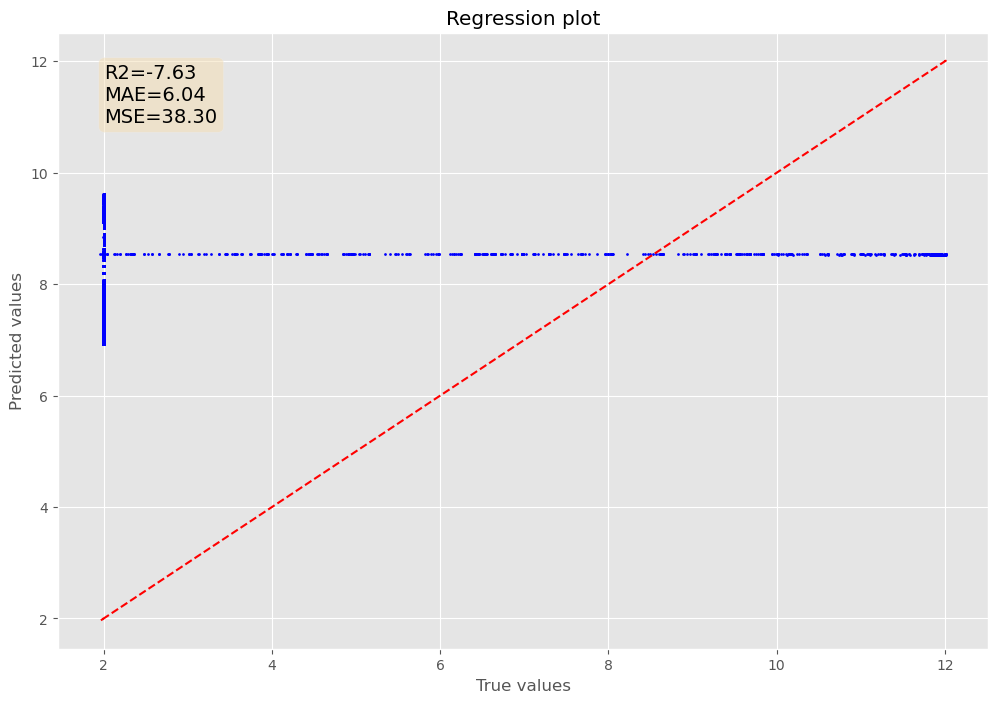

In [19]:
fig = plot_regression_true_vs_predicted(prepared_data, loaded_model_2, r2=True, mae=True, mse=True)
fig.savefig('lightning_logs/cscl/version_2/regression_plot.svg', format='svg', dpi=1200)

In [20]:
batch = torch.rand((1, 1))
loaded_model_2.eval()
torch.onnx.export(loaded_model_2, batch, 'lightning_logs/cscl/version_2/model.onnx', input_names=['Contuctivity'], output_names=['pH'])

/home/alcatraz/miniconda3/envs/membrane_robot/lib/python3.11/site-packages/torch/onnx/symbolic_opset9.py:4476: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [21]:
loaded_model_3 = RNNModule.load_from_checkpoint('lightning_logs/kcl/version_3/checkpoints/epoch=115-step=216572.ckpt', input_size=1, hidden_size=256, output_size=1, num_layers=7, bidirectional=True).cpu()

In [22]:
df_kcl = pd.read_excel(book, book.sheet_names[-2])
df_kcl = df_kcl.dropna()
df_kcl

,Time,pH,Conductivity,pH.1,Conductivity.1
2,0.008333,9.56,13.1343,9.43,12.9555
3,0.016667,9.56,13.1343,9.43,12.9555
4,0.025,9.55,13.1705,9.43,12.9555
5,0.033333,9.54,13.1343,9.43,12.9555
6,0.041667,9.54,13.1705,9.43,12.9555
...,...,...,...,...,...
2331,19.416667,1.96,22.3933,1.96,20.1225
2332,19.425,1.96,22.3571,1.95,20.0719
2333,19.433333,1.96,22.3571,1.95,20.0683
2334,19.441667,1.96,22.3933,1.95,20.0719


In [23]:
prepared_data = df_kcl.drop([df_cscl.columns[0], df_cscl.columns[2], df_cscl.columns[3]], axis=1)
prepared_data = prepared_data.dropna()
prepared_data

,pH,Conductivity.1
2,9.56,12.9555
3,9.56,12.9555
4,9.55,12.9555
5,9.54,12.9555
6,9.54,12.9555
...,...,...
2331,1.96,20.1225
2332,1.96,20.0719
2333,1.96,20.0683
2334,1.96,20.0719


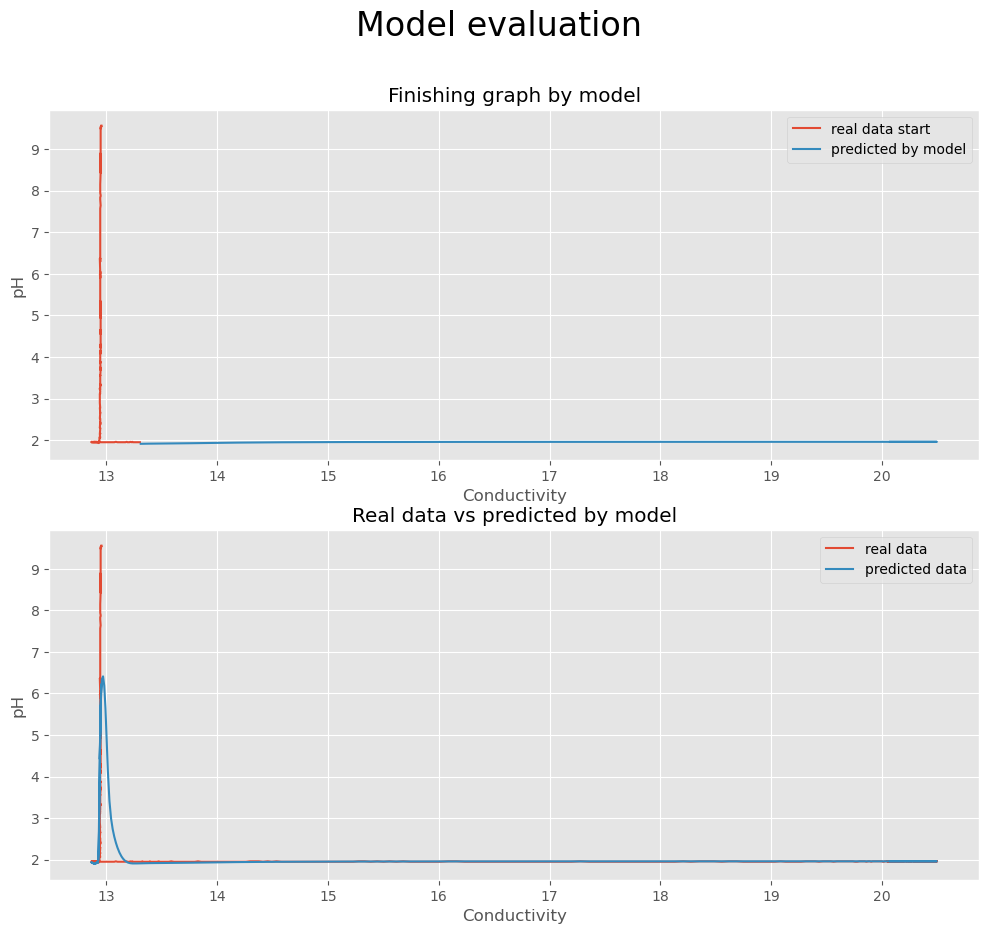

In [24]:
fig = plot_model_pred_vs_real_data(prepared_data, loaded_model_3, 500, reverse_x_axis=False)
fig.savefig('lightning_logs/kcl/version_3/model_evaluation.svg', format='svg', dpi=1200)

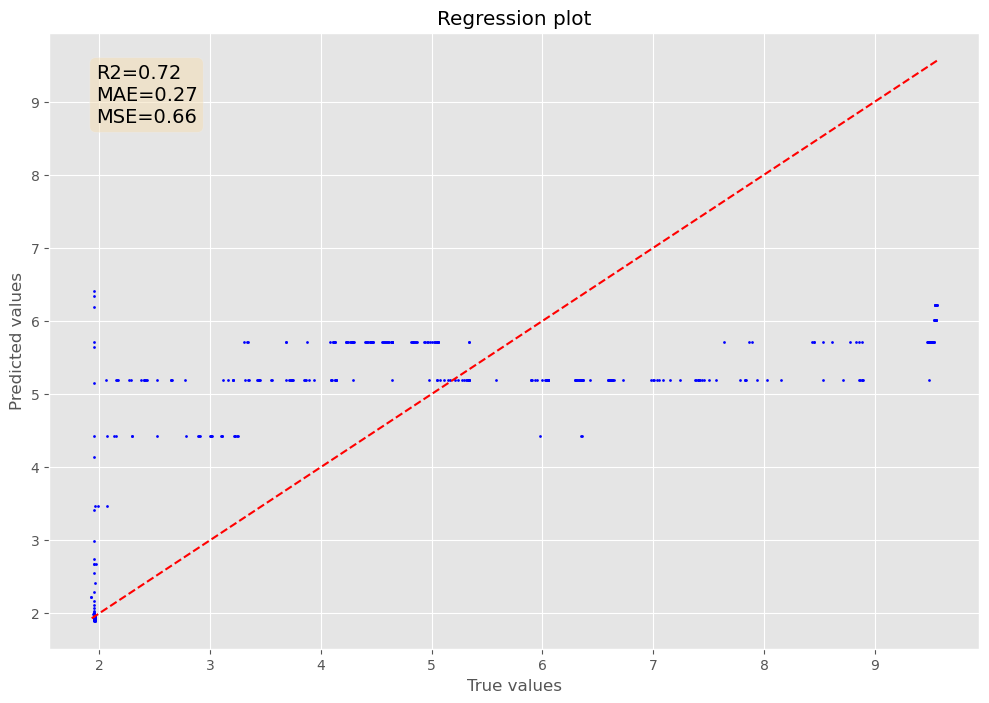

In [25]:
fig = plot_regression_true_vs_predicted(prepared_data, loaded_model_3, r2=True, mae=True, mse=True)
fig.savefig('lightning_logs/kcl/version_3/regression_plot.svg', format='svg', dpi=1200)

In [26]:
batch = torch.rand((1, 1))
loaded_model_3.eval()
torch.onnx.export(loaded_model_3, batch, 'lightning_logs/kcl/version_3/model.onnx', input_names=['Contuctivity'], output_names=['pH'])

/home/alcatraz/miniconda3/envs/membrane_robot/lib/python3.11/site-packages/torch/onnx/symbolic_opset9.py:4476: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

